# COMP 4151 Project - Part II - My Hypothesis

This notebook contains my testing and analysis of the hypothesis that **higher disability rates correllate with higher obesity rates**.

### II. Data Exploration

Study obesity in both adults and high school students in this data set.

Such a study may involve a number steps:

* Quick exploration of the data on the subject of obesity.
    + This requires that you ask basic questions. Many of these questions can be answered using pandas.
    + This may also require that you draw figures to get a better understanding of the data.  seaborn should be helpful here.

* Establishing a number of hypotheses about obesity (cause, effect, etc.)

* Analyze, report on your hypotheses.

An important goal of the project is for you to communicate effectively. Clarity in writing (English and Python) is extremely important. Readers do not want to guess how you arrive to your findings.




In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_src = 'BCHI-dataset_2019-03-04.csv'
df = pd.read_csv(data_src) \
       .rename(columns={'Race/Ethnicity': 'Race_Ethnicity'})

In [3]:
obese_adult = df.loc[df['Indicator'] == 'Percent of Adults Who Are Obese'] \
                .rename(columns={'Value': 'Obesity_Rate'})

obese_hs = df.loc[df['Indicator'] == 'Percent of High School Students Who Are Obese'] \
             .rename(columns={'Value': 'Obesity_Rate'})

disabled = df.loc[df['Indicator'] == 'Percent of Population with a Disability'] \
             .rename(columns={'Value': 'Disability_Rate'})

In [4]:
obese_adult =  obese_adult[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Obesity_Rate']]
obese_hs = obese_hs[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Obesity_Rate']]
disabled = disabled[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Disability_Rate']]

obese_adult = obese_adult.dropna()
obese_hs = obese_hs.dropna()
disabled = disabled.dropna()

obese_adult['Status'] = 'Adult'
obese_hs['Status'] = 'HS Student'

obese_all = pd.concat([obese_adult, obese_hs])

obese_all = obese_all[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Status', 'Obesity_Rate']]

obese_adult = obese_adult.drop(columns=['Status'])
obese_hs = obese_hs.drop(columns=['Status'])

In [5]:
obese_disabled_adult = obese_adult.merge(disabled)
obese_disabled_adult.sample(3)

,Year,Sex,Race_Ethnicity,Place,Obesity_Rate,Disability_Rate
160,2013,Both,White,"Boston, MA",16.2,9.5
119,2013,Both,Asian/PI,"New York City, NY",10.2,6.2
302,2015,Both,Asian/PI,"New York City, NY",7.3,6.6


In [6]:
obese_disabled_hs = obese_hs.merge(disabled)
obese_disabled_hs.sample(3)

,Year,Sex,Race_Ethnicity,Place,Obesity_Rate,Disability_Rate
73,2013,Male,All,"San Francisco, CA",10.3,10.0
116,2015,Both,Black,"Boston, MA",17.1,16.2
95,2015,Both,All,"Las Vegas (Clark County), NV",11.4,12.0


In [7]:
obese_disabled_all = obese_all.merge(disabled)
obese_disabled_all.sample(3)

,Year,Sex,Race_Ethnicity,Place,Status,Obesity_Rate,Disability_Rate
118,2013,Both,All,"New York City, NY",HS Student,11.8,10.3
81,2012,Female,All,"San Antonio, TX",Adult,31.0,14.0
308,2014,Both,Hispanic,"San Diego County, CA",Adult,25.6,7.2


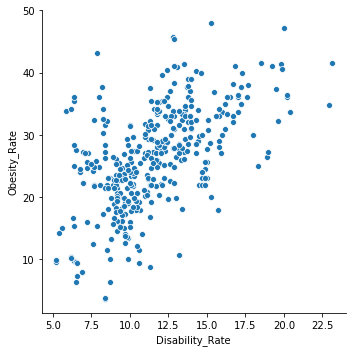

In [8]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_adult)

In [9]:
obese_disabled_adult[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.578036
Disability_Rate,0.578036,1.000000


The correlation between the rates of disability in populations and the rates of obesity in the adults of populations is $0.578$.

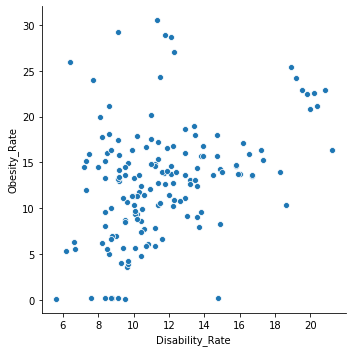

In [10]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_hs)

In [11]:
obese_disabled_hs[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.376346
Disability_Rate,0.376346,1.000000


The correlation between the rates of disability in populations and the rates of obesity in the high school students of populations is $0.376$.

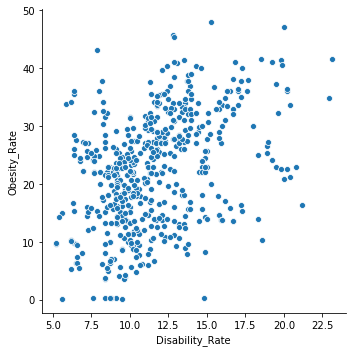

In [12]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_all)

In [13]:
obese_disabled_all[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.405618
Disability_Rate,0.405618,1.000000


The correlation between the rates of disability in populations and the rates of obesity in populations is $0.406$.

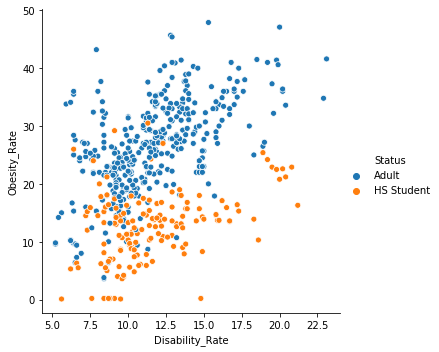

In [14]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', hue='Status', data=obese_disabled_all)

Now, let's build some regression models that try to predict $\textit{Obesity Rate}$ given $\textit{Disability Rate}$ or try to predict $\textit{Disability Rate}$ given $\textit{Obesity Rate}$.

In [15]:
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

In [16]:
adult_obesity_rate_X = obese_disabled_adult[['Obesity_Rate']]
hs_obesity_rate_X = obese_disabled_hs[['Obesity_Rate']]
all_obesity_rate_X = obese_disabled_all[['Obesity_Rate']]

adult_obesity_rate_y = obese_disabled_adult['Obesity_Rate']
hs_obesity_rate_y = obese_disabled_hs['Obesity_Rate']
all_obesity_rate_y = obese_disabled_all['Obesity_Rate']

adult_disability_rate_X = obese_disabled_adult[['Disability_Rate']]
hs_disability_rate_X = obese_disabled_hs[['Disability_Rate']]
all_disability_rate_X = obese_disabled_all[['Disability_Rate']]

adult_disability_rate_y = obese_disabled_adult['Disability_Rate']
hs_disability_rate_y = obese_disabled_hs['Disability_Rate']
all_disability_rate_y = obese_disabled_all['Disability_Rate']

cv = ShuffleSplit(n_splits=10)

In [17]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svm_lin = SVR(kernel='linear', gamma='auto')
svm_poly = SVR(kernel='poly', degree=2, gamma='auto')

In [18]:
def evaluate(model):
    score = round(cross_validate(model, adult_disability_rate_X, adult_obesity_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = Adult Disability Rate, y = Adult Obesity Rate, score = ', score)
    score = round(cross_validate(model, adult_obesity_rate_X, adult_disability_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = Adult Obesity Rate, y = Adult Disability Rate, score = ', score)
    score = round(cross_validate(model, hs_disability_rate_X, hs_obesity_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = HS Disability Rate, y = HS Obesity Rate, score = ', score)
    score = round(cross_validate(model, hs_obesity_rate_X, hs_disability_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = HS Obesity Rate, y = HS Disability Rate, score = ', score)
    score = round(cross_validate(model, all_disability_rate_X, all_obesity_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = All Disability Rate, y = All Obesity Rate, score = ', score)
    score = round(cross_validate(model, all_obesity_rate_X, all_disability_rate_y, cv=cv)['test_score'].mean(), 2)
    print('X = All Obesity Rate, y = All Disability Rate, score = ', score)

In [19]:
print('Decision Tree Regressor Scores:')
evaluate(dtr)

Decision Tree Regressor Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  -0.05
X = Adult Obesity Rate, y = Adult Disability Rate, score =  -0.02
X = HS Disability Rate, y = HS Obesity Rate, score =  -0.67
X = HS Obesity Rate, y = HS Disability Rate, score =  -1.34
X = All Disability Rate, y = All Obesity Rate, score =  -0.1
X = All Obesity Rate, y = All Disability Rate, score =  -0.34


In [20]:
print('Random Forest Regressor Scores:')
evaluate(rfr)

Random Forest Regressor Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.35
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.01
X = HS Disability Rate, y = HS Obesity Rate, score =  -0.35
X = HS Obesity Rate, y = HS Disability Rate, score =  -0.22
X = All Disability Rate, y = All Obesity Rate, score =  -0.03
X = All Obesity Rate, y = All Disability Rate, score =  -0.13


In [21]:
print('Linear Regression Scores:')
evaluate(lr)

Linear Regression Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.28
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.36
X = HS Disability Rate, y = HS Obesity Rate, score =  0.09
X = HS Obesity Rate, y = HS Disability Rate, score =  -0.24
X = All Disability Rate, y = All Obesity Rate, score =  0.15
X = All Obesity Rate, y = All Disability Rate, score =  0.08


In [22]:
print('Lasso Scores:')
evaluate(lasso)

Lasso Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.31
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.26
X = HS Disability Rate, y = HS Obesity Rate, score =  0.08
X = HS Obesity Rate, y = HS Disability Rate, score =  0.1
X = All Disability Rate, y = All Obesity Rate, score =  0.14
X = All Obesity Rate, y = All Disability Rate, score =  0.16


In [23]:
print('Ridge Scores:')
evaluate(ridge)

Ridge Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.29
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.29
X = HS Disability Rate, y = HS Obesity Rate, score =  0.02
X = HS Obesity Rate, y = HS Disability Rate, score =  0.07
X = All Disability Rate, y = All Obesity Rate, score =  0.18
X = All Obesity Rate, y = All Disability Rate, score =  0.14


In [24]:
print('Linear Support Vector Machine Scores:')
evaluate(svm_lin)

Linear Support Vector Machine Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.27
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.24
X = HS Disability Rate, y = HS Obesity Rate, score =  0.13
X = HS Obesity Rate, y = HS Disability Rate, score =  0.01
X = All Disability Rate, y = All Obesity Rate, score =  0.12
X = All Obesity Rate, y = All Disability Rate, score =  0.14


In [25]:
model = svm_poly

print('Polynomial (Degree 2) Support Vector Machine Scores:')

X_train, X_test, y_train, y_test = train_test_split(adult_disability_rate_X, adult_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Adult Disability Rate, y = Adult Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(adult_obesity_rate_X, adult_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Adult Obesity Rate, y = Adult Disability Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(hs_disability_rate_X, hs_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = HS Disability Rate, y = HS Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(hs_obesity_rate_X, hs_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = HS Obesity Rate, y = HS Disability Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(all_disability_rate_X, all_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = All Disability Rate, y = All Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(all_obesity_rate_X, all_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = All Obesity Rate, y = All Disability Rate, score = ', score)

Polynomial (Degree 2) Support Vector Machine Scores:
X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.29
X = Adult Obesity Rate, y = Adult Disability Rate, score =  0.3
X = HS Disability Rate, y = HS Obesity Rate, score =  0.14
X = HS Obesity Rate, y = HS Disability Rate, score =  -0.02
X = All Disability Rate, y = All Obesity Rate, score =  0.16
X = All Obesity Rate, y = All Disability Rate, score =  0.15


Now, let's build a Ridge model.

In [26]:
model = Ridge()
X_train, X_test, y_train, y_test = train_test_split(adult_disability_rate_X, adult_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Adult Disability Rate, y = Adult Obesity Rate, score = ', score)

X = Adult Disability Rate, y = Adult Obesity Rate, score =  0.32


In [27]:
ob_dis = obese_disabled_adult.copy(deep=True)
ob_dis = ob_dis[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Disability_Rate', 'Obesity_Rate']]
predictions = model.predict(ob_dis[['Disability_Rate']])
ob_dis['Predicted_Obesity_Rate'] = predictions

In [28]:
ob_dis.sample(5)

,Year,Sex,Race_Ethnicity,Place,Disability_Rate,Obesity_Rate,Predicted_Obesity_Rate
117,2013,Both,Asian/PI,"U.S. Total, U.S. Total",6.5,9.6,19.096066
143,2013,Both,Hispanic,"Boston, MA",13.5,27.3,28.724781
74,2012,Female,All,"Las Vegas (Clark County), NV",10.5,27.4,24.598189
145,2013,Both,Hispanic,"New York City, NY",11.2,30.8,25.561061
199,2013,Male,All,"Philadelphia, PA",14.7,24.0,30.375418


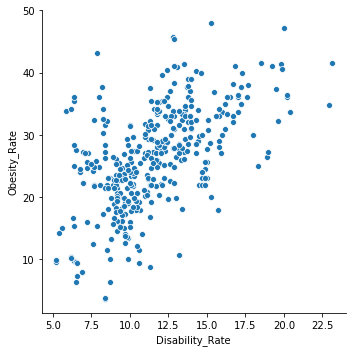

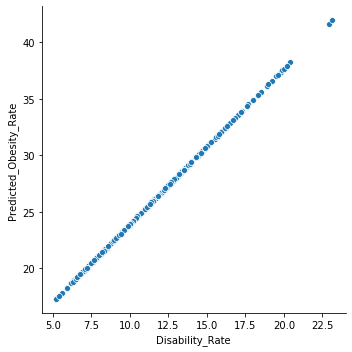

In [29]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=ob_dis)
sns.relplot(x='Disability_Rate', y='Predicted_Obesity_Rate', data=ob_dis)